In [1]:
import time
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from matplotlib import animation
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
terror_df = pd.read_csv('/content/drive/My Drive/BaseForAnalysis_Version2.csv', sep=',', encoding="ISO-8859-1")


In [4]:
terror_df.head(10)

,Unnamed: 0,eventid,year,month,day,extended,country,region,city,latitude,longitude,vicinity,crit,multiple,success,suicide,attacktype,targettype,nationality,organisation,nperps,claimedresp,weapontype,nkilled,nkillonlyter,nwounded,propdamageextent,victimkidnapped,ransomdemanded,nreleased,ncasualties
0,0,197000000002,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,0,1,0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,7.0,NaN,Unknown,0.0,NaN,0.0,NaN,1.0,1.0,NaN,0.0
1,1,197001000001,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,0,1,0,1,0,Assassination,Journalists & Media,United States,Unknown,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0.0,0.0,NaN,1.0
2,2,197001000002,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,0,1,0,1,0,Bombing/Explosion,Government (Diplomatic),United States,Unknown,NaN,NaN,Explosives,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,3,197001000003,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,0,1,0,1,0,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
4,4,197001010002,1970,1,1,0,United States,North America,Cairo,37.005105,-89.176269,0,1,0,1,0,Armed Assault,Police,United States,Black Nationalists,-99.0,0.0,Firearms,0.0,0.0,0.0,Minor,0.0,0.0,NaN,0.0
5,5,197001050001,1970,1,1,0,United States,North America,Baraboo,43.468500,-89.744299,0,1,0,0,0,Bombing/Explosion,Military,United States,"Weather Underground, Weathermen",NaN,NaN,Explosives,0.0,NaN,0.0,Minor,0.0,0.0,NaN,0.0
6,6,197001020001,1970,1,2,0,Uruguay,South America,Montevideo,-34.891151,-56.187214,0,1,0,0,0,Assassination,Police,Uruguay,Tupamaros (Uruguay),3.0,NaN,Firearms,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
7,7,197001020002,1970,1,2,0,United States,North America,Oakland,37.791927,-122.225906,0,1,0,1,0,Bombing/Explosion,Utilities,United States,Unknown,-99.0,0.0,Explosives,0.0,0.0,0.0,Minor,0.0,0.0,NaN,0.0
8,8,197001020003,1970,1,2,0,United States,North America,Madison,43.076592,-89.412488,0,1,0,1,0,Facility/Infrastructure Attack,Military,United States,New Year's Gang,1.0,1.0,Incendiary,0.0,0.0,0.0,Minor,0.0,0.0,NaN,0.0
9,9,197001030001,1970,1,3,0,United States,North America,Madison,43.072950,-89.386694,0,1,0,1,0,Facility/Infrastructure Attack,Government (General),United States,New Year's Gang,1.0,0.0,Incendiary,0.0,0.0,0.0,Minor,0.0,0.0,NaN,0.0


In [5]:
terror_df.columns

Index(['Unnamed: 0', 'eventid', 'year', 'month', 'day', 'extended', 'country',
       'region', 'city', 'latitude', 'longitude', 'vicinity', 'crit',
       'multiple', 'success', 'suicide', 'attacktype', 'targettype',
       'nationality', 'organisation', 'nperps', 'claimedresp', 'weapontype',
       'nkilled', 'nkillonlyter', 'nwounded', 'propdamageextent',
       'victimkidnapped', 'ransomdemanded', 'nreleased', 'ncasualties'],
      dtype='object')

In [9]:
terror_df[['nkilled', 'nkillonlyter', 'nwounded', 'propdamageextent', 
        'ncasualties']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
nkilled,189233.0,2.411044,11.252288,0.0,0.0,0.0,2.0,1570.0
nkillonlyter,133316.0,0.536845,4.258953,0.0,0.0,0.0,0.0,500.0
nwounded,182259.0,3.126007,41.728920,0.0,0.0,0.0,2.0,10878.0
ncasualties,181582.0,5.259761,47.631602,0.0,0.0,1.0,4.0,12263.0


In [10]:
terror_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201183 entries, 0 to 201182
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        201183 non-null  int64  
 1   eventid           201183 non-null  int64  
 2   year              201183 non-null  int64  
 3   month             201183 non-null  int64  
 4   day               201183 non-null  int64  
 5   extended          201183 non-null  int64  
 6   country           201183 non-null  object 
 7   region            201183 non-null  object 
 8   city              200757 non-null  object 
 9   latitude          196556 non-null  float64
 10  longitude         196555 non-null  float64
 11  vicinity          201183 non-null  int64  
 12  crit              201183 non-null  int64  
 13  multiple          201183 non-null  int64  
 14  success           201183 non-null  int64  
 15  suicide           201183 non-null  int64  
 16  attacktype        20

.....


....


Text(0.5, 1.0, 'Number of Terrorist Attack by Year')

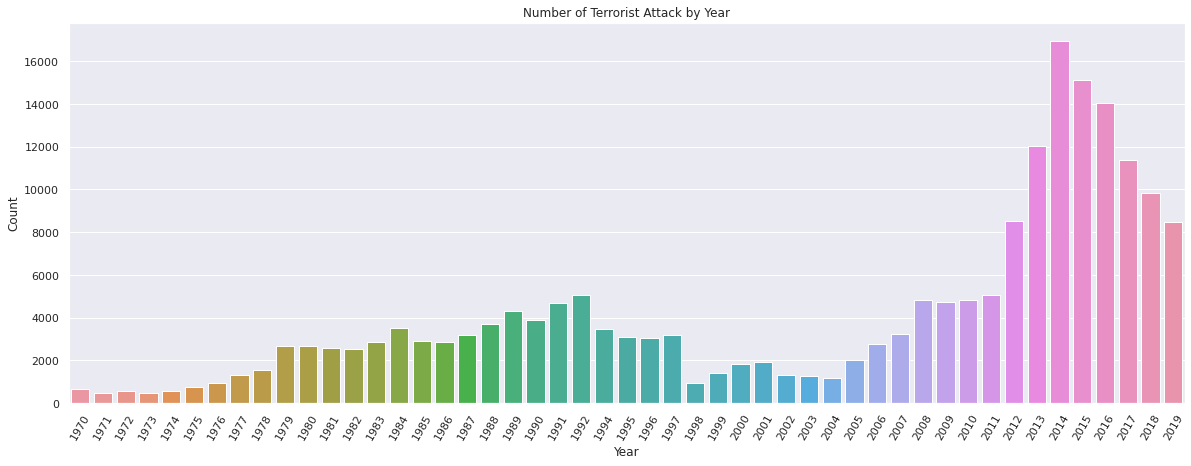

In [ ]:
f = plt.figure(figsize=(20, 7))

sns.set(font_scale = 1.1)
sns.set_theme(style = "darkgrid")
xaxis = sns.countplot(x = 'year', data = terror_df)
xaxis.set_xticklabels(xaxis.get_xticklabels(), rotation=60)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Number of Terrorist Attack by Year', fontsize = 12)

Text(0.5, 1.0, 'Number of Terrorist Attack by Region')

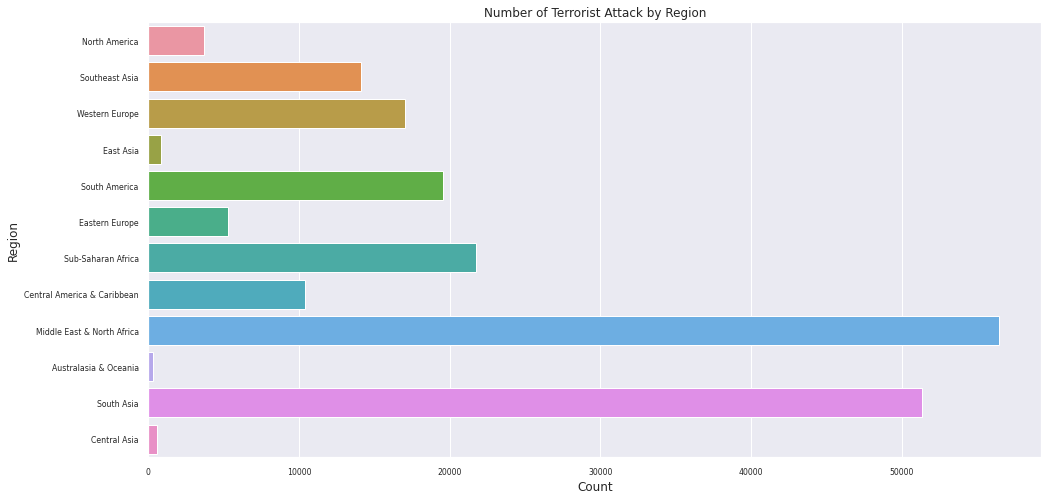

In [ ]:
f = plt.figure(figsize=(16, 8))

sns.set(font_scale=0.7)
sns.countplot(y='region', data=terror_df)
plt.ylabel('Region', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.title('Number of Terrorist Attack by Region', fontsize=12)

Text(0.5, 1.0, 'Types of Terrorist Attack ')

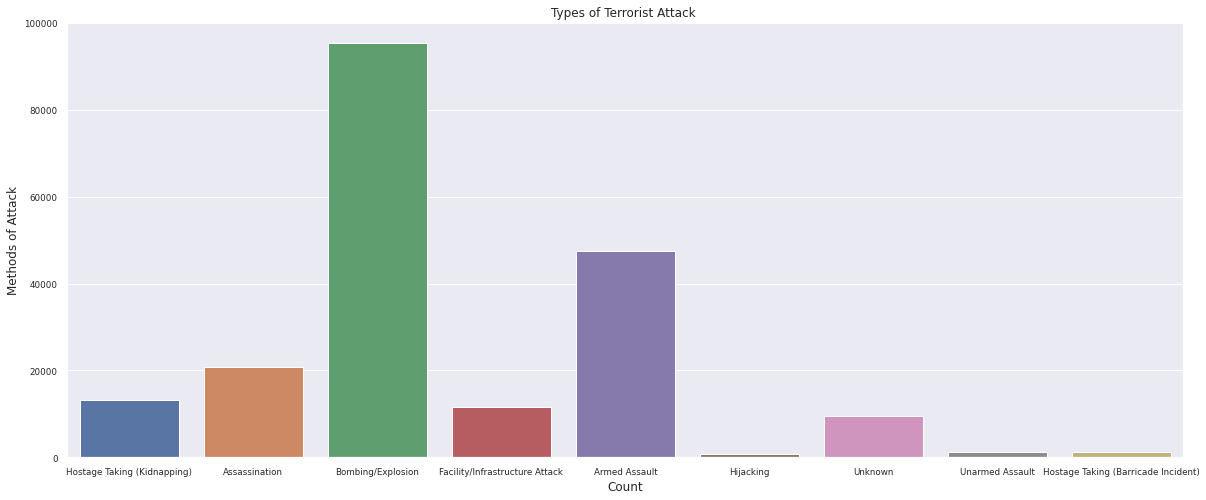

In [ ]:
f = plt.figure(figsize=(20, 8))

sns.set(font_scale=0.8)
sns.countplot(x='attacktype', data=terror_df,)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Methods of Attack', fontsize=12)
plt.title('Types of Terrorist Attack ', fontsize=12)

Text(0.5, 1.0, 'Types of Target')

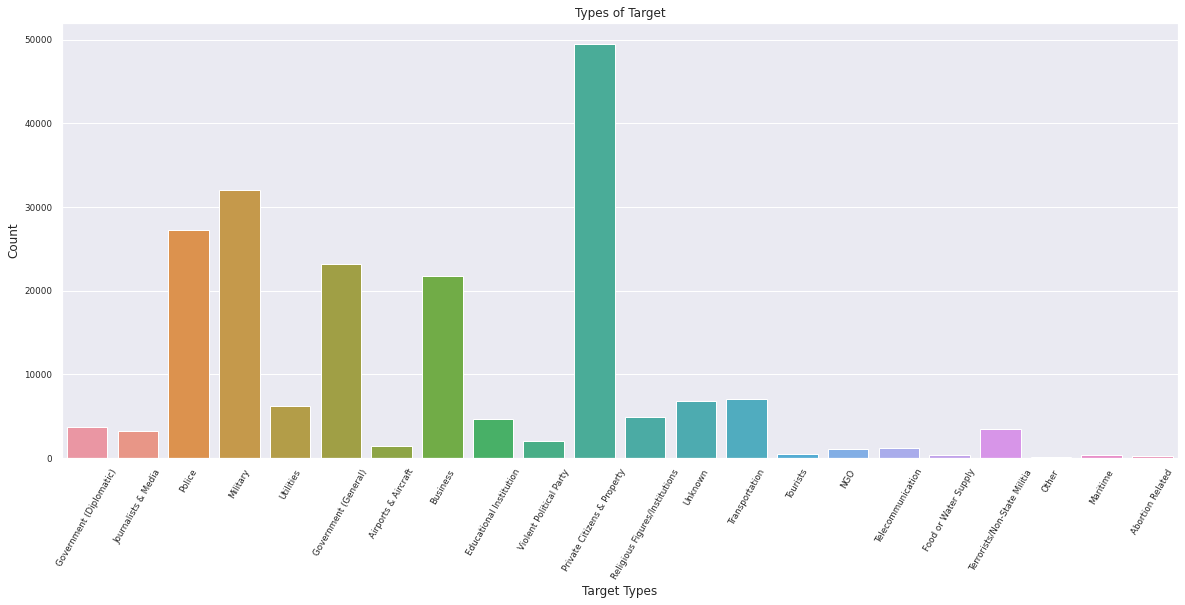

In [ ]:
f = plt.figure(figsize=(20, 8))

sns.set(font_scale=0.8)
xaxis = sns.countplot(x='targettype', data=terror_df,)
xaxis.set_xticklabels(xaxis.get_xticklabels(), rotation=60)
plt.xlabel('Target Types', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Types of Target', fontsize=12)

Text(0.5, 1.0, 'Top 15 Countries: Most Attacks by Terrorist Groups')

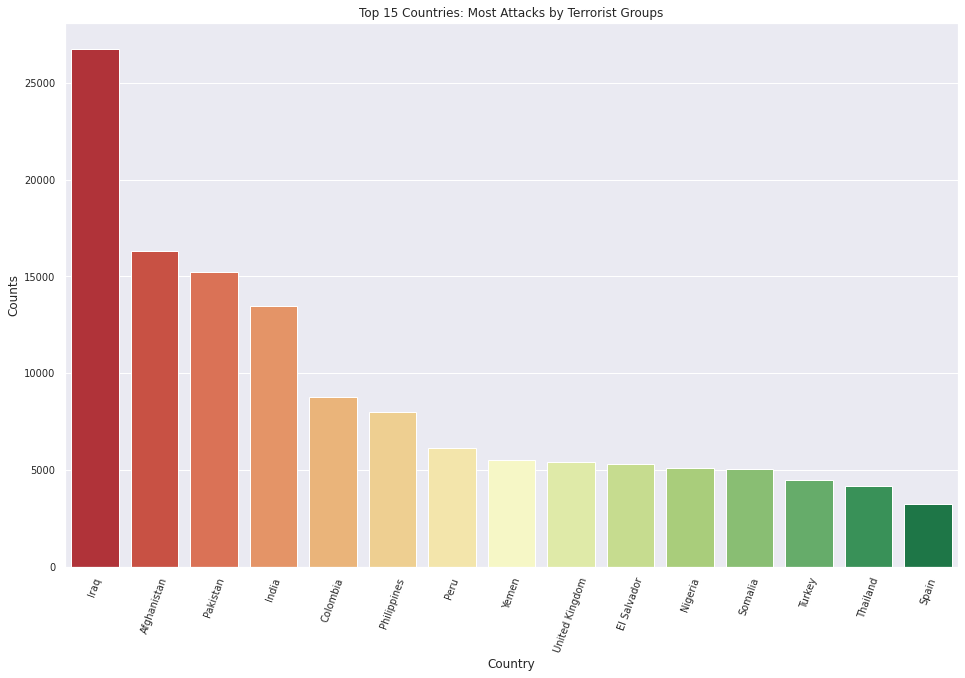

In [ ]:
fig= plt.figure(figsize=(16, 10))
sns.set(font_scale=0.9)
terror_country = sns.barplot(x=terror_df['country'].value_counts()[0:15].index, y=terror_df['country'].value_counts()[0:15], palette='RdYlGn')
terror_country.set_xticklabels(terror_country.get_xticklabels(), rotation=70)
terror_country.set_xlabel('Country', fontsize=12)
terror_country.set_ylabel('Counts', fontsize=12)
plt.title('Top 15 Countries: Most Attacks by Terrorist Groups', fontsize=12)

......

.............

........

.......

In [ ]:
region_year = pd.crosstab(terror_df.year, terror_df.region)

region_year.head(20)

region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317
1975,0,9,0,12,0,44,159,55,4,7,12,438
1976,0,45,0,2,0,55,125,91,4,12,11,578
1977,0,24,0,4,2,211,149,119,2,8,29,771
1978,2,199,0,35,2,128,117,222,2,44,46,729


Text(0.5, 1.0, 'Number of Attacks per Region by Year')

<Figure size 1152x720 with 0 Axes>

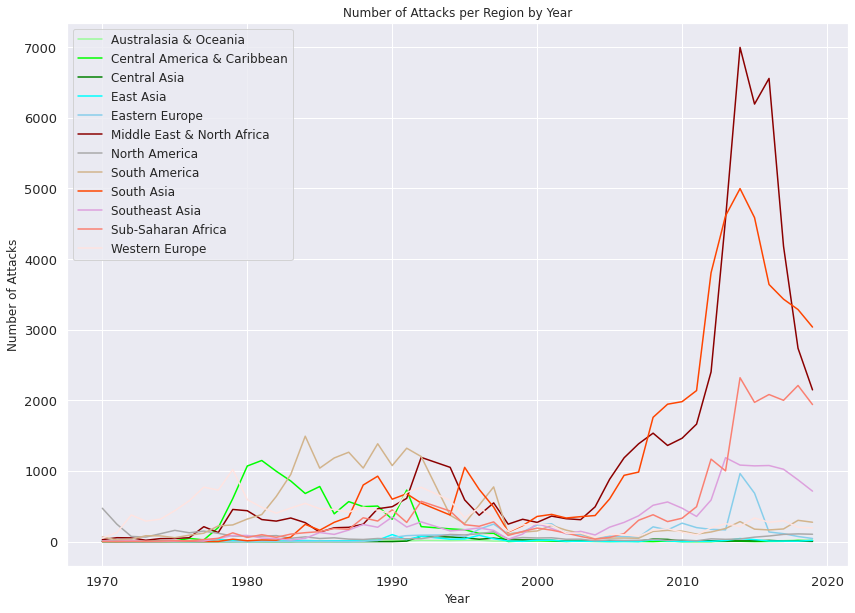

In [ ]:
fig = plt.figure(figsize=(16, 10))

color_list_reg_yr = ['palegreen', 'lime', 'green', 'Aqua', 'skyblue', 'darkred', 'darkgray', 'tan', 
                    'orangered', 'plum', 'salmon', 'mistyrose']
region_year.plot(figsize=(14, 10), fontsize=13, color=color_list_reg_yr)
#region_year.plot(figsize=(14, 10), fontsize=13)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.legend(fontsize=12)
plt.title('Number of Attacks per Region by Year', fontsize=12)

In [ ]:
attacktype_year = pd.crosstab(terror_df.year, terror_df.attacktype)

attacktype_year.head(20)

attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
year,,,,,,,,,
1970,61,22,333,174,11,3,38,3,6
1971,44,70,239,88,6,1,20,0,3
1972,63,265,188,19,12,4,16,0,1
1973,62,164,149,36,8,7,43,3,1
1974,46,158,285,42,3,5,37,4,1
1975,81,181,370,64,1,13,27,0,3
1976,124,204,419,113,4,6,45,3,5
1977,254,146,635,182,7,14,67,0,14
1978,241,263,644,181,0,43,97,5,52


Text(0.5, 1.0, 'Weapon trends by Year')

<Figure size 1152x720 with 0 Axes>

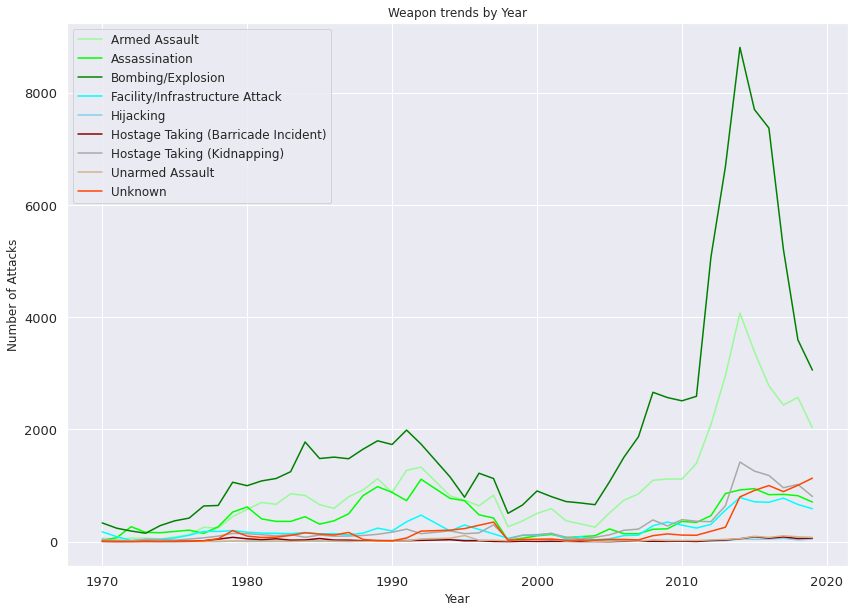

In [ ]:
fig = plt.figure(figsize=(16, 10))

color_list_reg_yr = ['palegreen', 'lime', 'green', 'Aqua', 'skyblue', 'darkred', 'darkgray', 'tan', 
                    'orangered', 'plum', 'salmon', 'mistyrose']
attacktype_year.plot(figsize=(14, 10), fontsize=13, color=color_list_reg_yr)
#region_year.plot(figsize=(14, 10), fontsize=13)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.legend(fontsize=12)
plt.title('Weapon trends by Year', fontsize=12)

Text(0.5, 1.0, 'Number of Terrorist Attack by Year')

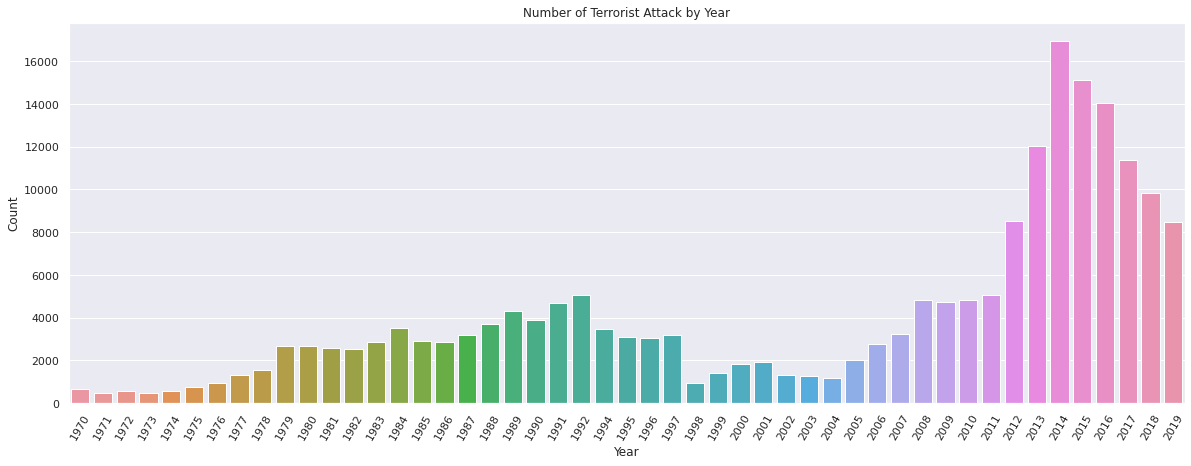

In [13]:
f = plt.figure(figsize=(20, 7))

sns.set(font_scale = 1.1)
sns.set_theme(style = "darkgrid")
xaxis = sns.countplot(x = 'year', data = terror_df)
xaxis.set_xticklabels(xaxis.get_xticklabels(), rotation=60)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Number of Terrorist Attack by Year', fontsize = 12)

